<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Tipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=97f168f346e931538b87fe2e773198f6130a5e8b3c83d2b34c31a2b3a1b9b413
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


21.724990032981772


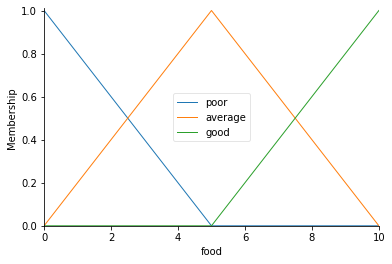

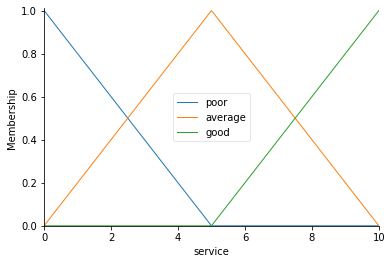

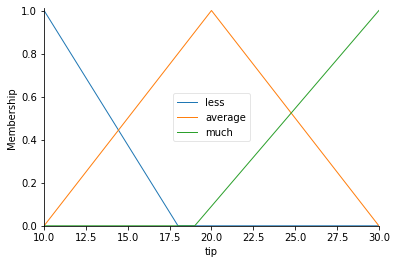

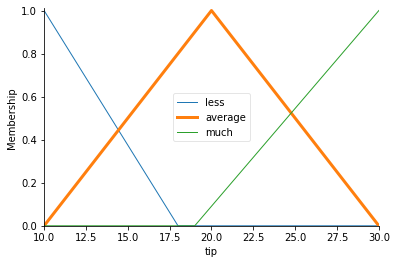

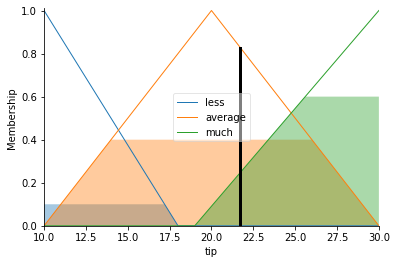

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food =ctrl.Antecedent(np.arange(0,11,1),'food')
service =ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,18])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[19,30,30])

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3 = ctrl.Rule(food['good']&service['poor'],tip['average'])
rule4 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule7 = ctrl.Rule(food['poor']&service['good'],tip['average'])
rule8 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 8
tipping.input['service'] = 4.5
tipping.compute() #tính toán

food.view()
service.view()
tip.view()
tip['average'].view()
print(tipping.output['tip'])
tip.view(sim = tipping)